In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import pickle
import calendar

In [38]:
data = pd.read_excel('precios_mexico_test.xlsx', index_col="FECHA_HORA", names=['P'])
data.head()

P
FECHA_HORA                 
2018-01-11 00:00:00  38.878
2018-01-11 01:00:00  33.544
2018-01-11 02:00:00  32.477
2018-01-11 03:00:00  32.498
2018-01-11 04:00:00  32.659

In [3]:
def procesing(df):
    ''' Adds lags  and day_of_week and month columns to dataframe'''
    
    # Add Lags
    df_shifted = pd.concat([df]+[df['P'].shift(i) for i in range(24,49)]+[df['P'].shift(i) for i in range(168,193)], axis=1)
    df_shifted.columns = ['P']+['Ph-{}'.format(i) for i in range(24,49)] + ['Ph-{}'.format(i) for i in range(168,193)]
    
    # Add day_of_week column
    df_shifted['day_of_week'] = df.index.weekday_name
    
    # Add month abbreviature column
    df_shifted['month'] = df_shifted.index.month
    df_shifted['month'] = df_shifted['month'].apply(lambda x: calendar.month_abbr[x])
    
    # Add one-hot Encoding
    df = pd.get_dummies(df_shifted)
    
    return df.dropna()

In [26]:
data.tail(24)

PRECIO
FECHA_HORA                  
2019-01-11 00:00:00   64.452
2019-01-11 01:00:00   56.638
2019-01-11 02:00:00   48.571
2019-01-11 03:00:00   47.260
2019-01-11 04:00:00   46.103
2019-01-11 05:00:00   55.939
2019-01-11 06:00:00   67.026
2019-01-11 07:00:00   76.771
2019-01-11 08:00:00   83.542
2019-01-11 09:00:00   89.540
2019-01-11 10:00:00   86.793
2019-01-11 11:00:00   90.080
2019-01-11 12:00:00   88.869
2019-01-11 13:00:00   90.831
2019-01-11 14:00:00   90.831
2019-01-11 15:00:00   86.253
2019-01-11 16:00:00   86.388
2019-01-11 17:00:00   90.831
2019-01-11 18:00:00  101.183
2019-01-11 19:00:00  102.504
2019-01-11 20:00:00   98.774
2019-01-11 21:00:00   87.426
2019-01-11 22:00:00   85.978
2019-01-11 23:00:00   85.158

In [6]:
import datetime

In [14]:
base = datetime.datetime(2019, 1, 12)
date_arr = np.array([base + datetime.timedelta(hours=i) for i in range(24)])

In [32]:
df = pd.DataFrame(np.zeros(24), date_arr, columns=['P'])

In [34]:
df.index.name = "FECHA_HORA"
df

P
FECHA_HORA              
2019-01-12 00:00:00  0.0
2019-01-12 01:00:00  0.0
2019-01-12 02:00:00  0.0
2019-01-12 03:00:00  0.0
2019-01-12 04:00:00  0.0
2019-01-12 05:00:00  0.0
2019-01-12 06:00:00  0.0
2019-01-12 07:00:00  0.0
2019-01-12 08:00:00  0.0
2019-01-12 09:00:00  0.0
2019-01-12 10:00:00  0.0
2019-01-12 11:00:00  0.0
2019-01-12 12:00:00  0.0
2019-01-12 13:00:00  0.0
2019-01-12 14:00:00  0.0
2019-01-12 15:00:00  0.0
2019-01-12 16:00:00  0.0
2019-01-12 17:00:00  0.0
2019-01-12 18:00:00  0.0
2019-01-12 19:00:00  0.0
2019-01-12 20:00:00  0.0
2019-01-12 21:00:00  0.0
2019-01-12 22:00:00  0.0
2019-01-12 23:00:00  0.0

In [39]:
data_a = data.append(df)
data_a.tail(48)

P
FECHA_HORA                  
2019-01-11 00:00:00   64.452
2019-01-11 01:00:00   56.638
2019-01-11 02:00:00   48.571
2019-01-11 03:00:00   47.260
2019-01-11 04:00:00   46.103
2019-01-11 05:00:00   55.939
2019-01-11 06:00:00   67.026
2019-01-11 07:00:00   76.771
2019-01-11 08:00:00   83.542
2019-01-11 09:00:00   89.540
2019-01-11 10:00:00   86.793
2019-01-11 11:00:00   90.080
2019-01-11 12:00:00   88.869
2019-01-11 13:00:00   90.831
2019-01-11 14:00:00   90.831
2019-01-11 15:00:00   86.253
2019-01-11 16:00:00   86.388
2019-01-11 17:00:00   90.831
2019-01-11 18:00:00  101.183
2019-01-11 19:00:00  102.504
2019-01-11 20:00:00   98.774
2019-01-11 21:00:00   87.426
2019-01-11 22:00:00   85.978
2019-01-11 23:00:00   85.158
2019-01-12 00:00:00    0.000
2019-01-12 01:00:00    0.000
2019-01-12 02:00:00    0.000
2019-01-12 03:00:00    0.000
2019-01-12 04:00:00    0.000
2019-01-12 05:00:00    0.000
2019-01-12 06:00:00    0.000
2019-01-12 07:00:00    0.000
2019-01-12 08:00:00    0.000
2019-01-12 09:00:00    0.000
2019-01-12 10:00:00    0.000
2019-01-12 11:00:00    0.000
2019-01-12 12:00:00    0.000
2019-01-12 13:00:00    0.000
2019-01-12 14:00:00    0.000
2019-01-12 15:00:00    0.000
2019-01-12 16:00:00    0.000
2019-01-12 17:00:00    0.000
2019-01-12 18:00:00    0.000
2019-01-12 19:00:00    0.000
2019-01-12 20:00:00    0.000
2019-01-12 21:00:00    0.000
2019-01-12 22:00:00    0.000
2019-01-12 23:00:00    0.000

In [40]:
data = procesing(data_a)
data.tail(24)

P    Ph-24    Ph-25    Ph-26    Ph-27    Ph-28  \
FECHA_HORA                                                              
2019-01-12 00:00:00  0.0   64.452   65.682   67.307   68.010   71.212   
2019-01-12 01:00:00  0.0   56.638   64.452   65.682   67.307   68.010   
2019-01-12 02:00:00  0.0   48.571   56.638   64.452   65.682   67.307   
2019-01-12 03:00:00  0.0   47.260   48.571   56.638   64.452   65.682   
2019-01-12 04:00:00  0.0   46.103   47.260   48.571   56.638   64.452   
2019-01-12 05:00:00  0.0   55.939   46.103   47.260   48.571   56.638   
2019-01-12 06:00:00  0.0   67.026   55.939   46.103   47.260   48.571   
2019-01-12 07:00:00  0.0   76.771   67.026   55.939   46.103   47.260   
2019-01-12 08:00:00  0.0   83.542   76.771   67.026   55.939   46.103   
2019-01-12 09:00:00  0.0   89.540   83.542   76.771   67.026   55.939   
2019-01-12 10:00:00  0.0   86.793   89.540   83.542   76.771   67.026   
2019-01-12 11:00:00  0.0   90.080   86.793   89.540   83.542   76.771   
2019-01-12 12:00:00  0.0   88.869   90.080   86.793   89.540   83.542   
2019-01-12 13:00:00  0.0   90.831   88.869   90.080   86.793   89.540   
2019-01-12 14:00:00  0.0   90.831   90.831   88.869   90.080   86.793   
2019-01-12 15:00:00  0.0   86.253   90.831   90.831   88.869   90.080   
2019-01-12 16:00:00  0.0   86.388   86.253   90.831   90.831   88.869   
2019-01-12 17:00:00  0.0   90.831   86.388   86.253   90.831   90.831   
2019-01-12 18:00:00  0.0  101.183   90.831   86.388   86.253   90.831   
2019-01-12 19:00:00  0.0  102.504  101.183   90.831   86.388   86.253   
2019-01-12 20:00:00  0.0   98.774  102.504  101.183   90.831   86.388   
2019-01-12 21:00:00  0.0   87.426   98.774  102.504  101.183   90.831   
2019-01-12 22:00:00  0.0   85.978   87.426   98.774  102.504  101.183   
2019-01-12 23:00:00  0.0   85.158   85.978   87.426   98.774  102.504   

                       Ph-29   Ph-30   Ph-31   Ph-32    ...      month_Dec  \
FECHA_HORA                                              ...                  
2019-01-12 00:00:00   72.734  70.207  67.977  65.774    ...              0   
2019-01-12 01:00:00   71.212  72.734  70.207  67.977    ...              0   
2019-01-12 02:00:00   68.010  71.212  72.734  70.207    ...              0   
2019-01-12 03:00:00   67.307  68.010  71.212  72.734    ...              0   
2019-01-12 04:00:00   65.682  67.307  68.010  71.212    ...              0   
2019-01-12 05:00:00   64.452  65.682  67.307  68.010    ...              0   
2019-01-12 06:00:00   56.638  64.452  65.682  67.307    ...              0   
2019-01-12 07:00:00   48.571  56.638  64.452  65.682    ...              0   
2019-01-12 08:00:00   47.260  48.571  56.638  64.452    ...              0   
2019-01-12 09:00:00   46.103  47.260  48.571  56.638    ...              0   
2019-01-12 10:00:00   55.939  46.103  47.260  48.571    ...              0   
2019-01-12 11:00:00   67.026  55.939  46.103  47.260    ...              0   
2019-01-12 12:00:00   76.771  67.026  55.939  46.103    ...              0   
2019-01-12 13:00:00   83.542  76.771  67.026  55.939    ...              0   
2019-01-12 14:00:00   89.540  83.542  76.771  67.026    ...              0   
2019-01-12 15:00:00   86.793  89.540  83.542  76.771    ...              0   
2019-01-12 16:00:00   90.080  86.793  89.540  83.542    ...              0   
2019-01-12 17:00:00   88.869  90.080  86.793  89.540    ...              0   
2019-01-12 18:00:00   90.831  88.869  90.080  86.793    ...              0   
2019-01-12 19:00:00   90.831  90.831  88.869  90.080    ...              0   
2019-01-12 20:00:00   86.253  90.831  90.831  88.869    ...              0   
2019-01-12 21:00:00   86.388  86.253  90.831  90.831    ...              0   
2019-01-12 22:00:00   90.831  86.388  86.253  90.831    ...              0   
2019-01-12 23:00:00  101.183  90.831  86.388  86.253    ...              0   

                     month_Feb  month_Jan  month_Jul  month_Jun  month_Mar  \
FECHA_HORA       

In [68]:
X = data['2019-01-01':'2019-01-11'].drop('P', axis=1)

In [62]:
X

Ph-24   Ph-25   Ph-26   Ph-27   Ph-28    Ph-29    Ph-30  \
FECHA_HORA                                                                      
2019-01-10 00:00:00  55.631  76.995  81.011  88.597  87.297  103.092   87.329   
2019-01-10 01:00:00  48.475  55.631  76.995  81.011  88.597   87.297  103.092   
2019-01-10 02:00:00  43.340  48.475  55.631  76.995  81.011   88.597   87.297   
2019-01-10 03:00:00  34.094  43.340  48.475  55.631  76.995   81.011   88.597   
2019-01-10 04:00:00  40.626  34.094  43.340  48.475  55.631   76.995   81.011   
2019-01-10 05:00:00  46.586  40.626  34.094  43.340  48.475   55.631   76.995   
2019-01-10 06:00:00  59.818  46.586  40.626  34.094  43.340   48.475   55.631   
2019-01-10 07:00:00  70.443  59.818  46.586  40.626  34.094   43.340   48.475   
2019-01-10 08:00:00  75.760  70.443  59.818  46.586  40.626   34.094   43.340   
2019-01-10 09:00:00  76.826  75.760  70.443  59.818  46.586   40.626   34.094   
2019-01-10 10:00:00  77.875  76.826  75.760  70.443  59.818   46.586   40.626   
2019-01-10 11:00:00  77.911  77.875  76.826  75.760  70.443   59.818   46.586   
2019-01-10 12:00:00  76.230  77.911  77.875  76.826  75.760   70.443   59.818   
2019-01-10 13:00:00  75.996  76.230  77.911  77.875  76.826   75.760   70.443   
2019-01-10 14:00:00  76.712  75.996  76.230  77.911  77.875   76.826   75.760   
2019-01-10 15:00:00  78.241  76.712  75.996  76.230  77.911   77.875   76.826   
2019-01-10 16:00:00  76.144  78.241  76.712  75.996  76.230   77.911   77.875   
2019-01-10 17:00:00  78.009  76.144  78.241  76.712  75.996   76.230   77.911   
2019-01-10 18:00:00  78.212  78.009  76.144  78.241  76.712   75.996   76.230   
2019-01-10 19:00:00  79.343  78.212  78.009  76.144  78.241   76.712   75.996   
2019-01-10 20:00:00  78.756  79.343  78.212  78.009  76.144   78.241   76.712   
2019-01-10 21:00:00  79.886  78.756  79.343  78.212  78.009   76.144   78.241   
2019-01-10 22:00:00  74.803  79.886  78.756  79.343  78.212   78.009   76.144   
2019-01-10 23:00:00  69.404  74.803  79.886  78.756  79.343   78.212   78.009   

                       Ph-31    Ph-32    Ph-33    ...      month_Dec  \
FECHA_HORA                                        ...                  
2019-01-10 00:00:00   83.056   80.495   83.367    ...              0   
2019-01-10 01:00:00   87.329   83.056   80.495    ...              0   
2019-01-10 02:00:00  103.092   87.329   83.056    ...              0   
2019-01-10 03:00:00   87.297  103.092   87.329    ...              0   
2019-01-10 04:00:00   88.597   87.297  103.092    ...              0   
2019-01-10 05:00:00   81.011   88.597   87.297    ...              0   
2019-01-10 06:00:00   76.995   81.011   88.597    ...              0   
2019-01-10 07:00:00   55.631   76.995   81.011    ...              0   
2019-01-10 08:00:00   48.475   55.631   76.995    ...              0   
2019-01-10 09:00:00   43.340   48.475   55.631    ...              0   
2019-01-10 10:00:00   34.094   43.340   48.475    ...              0   
2019-01-10 11:00:00   40.626   34.094   43.340    ...              0   
2019-01-10 12:00:00   46.586   40.626   34.094    ...              0   
2019-01-10 13:00:00   59.818   46.586   40.626    ...              0   
2019-01-10 14:00:00   70.443   59.818   46.586    ...              0   
2019-01-10 15:00:00   75.760   70.443   59.818    ...              0   
2019-01-10 16:00:00   76.826   75.760   70.443    ...              0   
2019-01-10 17:00:00   77.875   76.826   75.760    ...              0   
2019-01-10 18:00:00   77.911   77.875   76.826    ...              0   
2019-01-10 19:00:00   76.230   77.911   77.875    ...              0   
2019-01-10 20:00:00   75.996   76.230   77.911    ...              0   
2019-01-10 21:00:00   76.712   75.996   76.230    ...              0   
2019-01-10 22:00:00   78.241   76.712   75.996    ...              0   
2019-01-10 23:00:00   76.144   78.241   76.712    ...              0   

                     month_Feb  month_Jan 

In [44]:
X.shape

(24, 69)

In [45]:
model = pickle.load(open("lbrprice_model_rgs.pkl","rb"))

In [69]:
pred = model.predict(X)

In [94]:
dateRange = pd.date_range('2019-01-01', '2019-01-12', freq='H').to_series()

<IPython.core.display.Javascript object>


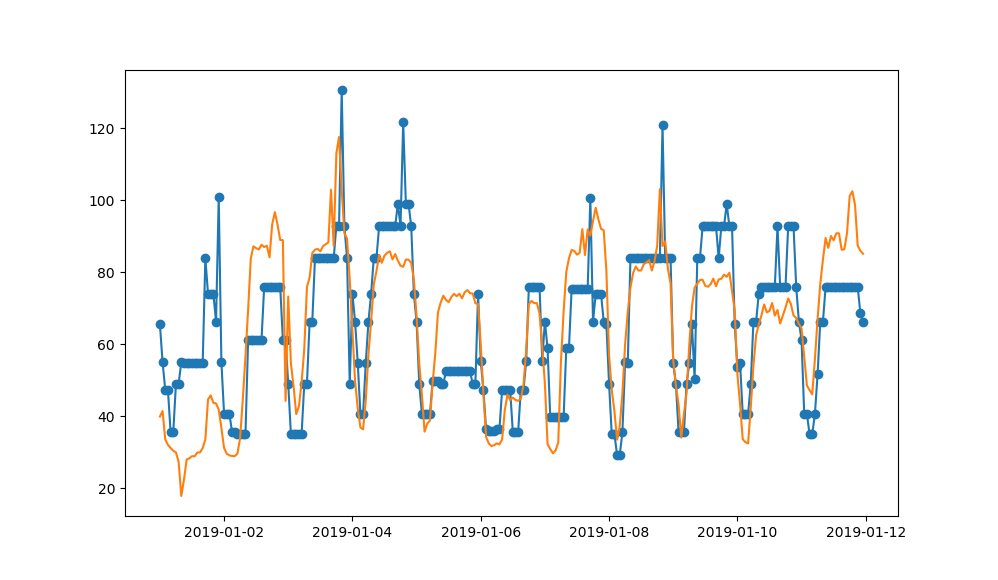

In [100]:
import matplotlib.pyplot as plt
plt.plot(dateRange[:264], pred, '-o')
plt.plot(dateRange[:264], data['2019-01-01':'2019-01-11']['P'].values)
plt.show()